# Data Processing in Python
Python è ormai considerato il linguaggio di programmazione standard della Data Science. Uno dei motivi che lo hanno portato ad essere tale è anche la presenza della libreria Pandas: quest'ultima permette in pochissime righe di codice di performare pressochè qualsiasi operazione su dei dati.

Quando viene iniziato un progetto di Data Science, la prima cosa che si fa è, generalmente, ispezionare i dati: importarli, riorganizzarli in modo da renderli pronti per i modelli, fare dei grafici e conteggiare anomalie o valori mancanti al loro interno.

In questo esercizio metteremo le mani su un vero dataset (qui le trovate informazioni riguardo al dataset e la sua struttura, leggete con cura: https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv): vi performeremo varie operazioni, dove però vi imporrò talvolta dei vincoli sul numero di righe di codice massimo che potete scrivere, l'obiettivo dell'esercizio è infatti quello di mostrare come Pandas abbia un comando per pressoché qualsiasi operazione.

Due file .csv sono già nella stessa cartella di questo notebook: "anime.csv" e "rating.csv", scaricate tutto quanto e mettete tutto nella stessa cartella in locale.

IMPORTANTE: l'utilizzo delle librerie in Python è talvolta molto intricato e nessuno è in grado di programmare ciecamente usando una libreria. Il consiglio che vi do, valido per questo notebook ma più in generale ogni qualvolta programmerete qualcosa, è quello di cercare su internet qualcuno che abbia già fatto la stessa identica cosa che dovete fare voi. Non abbiate paura di andarvi a scrivere letteralmente su Google cose tipo "pandas how to do etc. etc.", nel 95% dei casi troverete esattamente ciò che stavate cercando, altrimenti qualcosa di simile che potrete riadattare da soli cercando nella documentazione come funzionano i comandi che vi interessano.

In [1]:
### qui potete importare tutte le librerie che vi servono
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importare i dataset (2 righe)
anime = pd.read_csv('anime.csv',header=0,encoding = "ISO-8859-1")
rating = pd.read_csv('rating.csv',header=0)

In [3]:
# Visualizzare una parte di ognuno dei due dataset (2 righe)
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,GintamaÂ°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [6]:
# Scegliere ed impostare un indice adeguato per il dataframe "anime" (1 riga)
anime.set_index('anime_id', inplace=True)
anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,GintamaÂ°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
# Ad ora il dataframe "anime" è ordinato in base al rating (decreasing). Ordinare il dataframe alfabeticamente in base al "name"
# (1 riga)
anime = anime.sort_values(by ='name')

anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
20707,&quot;0&quot;,Music,Music,1,5.06,1170
25627,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,Kids,Movie,1,5.00,113
7669,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,"Comedy, Fantasy, School",OVA,1,7.06,14351
8481,&quot;Bungaku Shoujo&quot; Memoire,"Drama, Romance, School",OVA,3,7.54,18013
6408,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",Movie,1,7.63,40984


In [8]:
# Ci sono degli anime il cui nome non è stato correttamente encodato, rimuovere dal dataframe tutti gli anime il cui nome 
# inizia con '.' oppure '&' (1 riga)

anime=anime[(~anime.name.str.startswith("&")) & (~anime.name.str.startswith("."))]

anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147
33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37
29978,001,Comedy,ONA,1,4.00,916
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307
32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198


In [9]:
# Contare quanti Missing Values (NaN) ci sono in ogni colonna dei due dataframe (2 righe)
num_nan_anime = anime.isnull().sum()
num_nan_rating = rating.isnull().sum()

print(num_nan_anime)
print('\n')
print(num_nan_rating)

name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


user_id     0
anime_id    0
rating      0
dtype: int64


In [10]:
# Rimuovere tutti i Nan dal dataframe "anime" (1 riga)
anime = anime.dropna()

In [11]:
# Rimuovere tutti i rating -1 dal dataframe "rating" (1 riga)

rating = rating[~(rating.rating == -1)]

rating.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [12]:
# Adesso il nostro intento è utilizzare il dataframe "rating" per arricchire le informazioni contenute in "anime":
# osservare bene la struttura dei due dataframe, sebbene il rating medio per ogni anime sia già incluso nel dataframe, 
# siamo ora interessati alla deviazione standard del rating.

# Creare un dataframe che abbia come indice l'id di un anime e una colonna con all'interno la deviazione standard
# dei suoi ratings (1 riga)
std_rat = rating.groupby(['anime_id']).agg({'rating': ['std']})
std_rat.tail()

,rating
,std
anime_id,
34324,1.375103
34325,1.397276
34349,1.000000
34367,0.957427
34475,2.081666


In [13]:
# Unire al dataframe "anime" la colonna contenente le deviazioni standard dei rating: attenzione, questa deve essere ovviamente
# coerente con gli indici "anime_id". Quindi sostituire tutti i Nan che possono essersi generati (potremmo avere
# un anime senza alcun voto, oppure con uno solo, quindi deviazione standard Nan) con degli 0. Procedere infine a rimuovere qualsiasi colonna
# "doppione" possa essersi generate dalla prima operazione (massimo 2 righe).

anime['rating std'] = std_rat["rating"]
anime['rating std'] = anime['rating std'].fillna(0)
anime

,name,genre,type,episodes,rating,members,rating std
anime_id,,,,,,,
12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147,0.000000
33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37,0.000000
29978,001,Comedy,ONA,1,4.00,916,3.465705
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307,1.675079
32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198,0.000000
...,...,...,...,...,...,...,...
793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547,1.232423
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353,1.245483
4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401,1.163962


In [14]:
# Prima di procedere oltre ispezioniamo quali tipo di variabile Pandas ha assegnato (autonomamente) ad ogni colonna,
# stampare il tipo di ogni colonna di "anime" (1 riga)

anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11995 entries, 12763 to 31687
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11995 non-null  object 
 1   genre       11995 non-null  object 
 2   type        11995 non-null  object 
 3   episodes    11995 non-null  object 
 4   rating      11995 non-null  float64
 5   members     11995 non-null  int64  
 6   rating std  11995 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 562.3+ KB


In [15]:
# Il tipo object è usato per le stringhe, una colonna in particolare ha un tipo assegnato che forse non è quello più corretto.
# Ispezionare tutti i possibili valori che può assumere quella colonna e trovare il motivo per cui è stata assegnata con quel 
# tipo da pandas (1 riga)

# episodes? controlliamo
anime.episodes.unique()
# c'è un "unknown" pofferbacchio!!

array(['38', '1', '10', '12', '25', '2', '13', '8', '4', '3', '39', '35',
       '23', 'Unknown', '26', '6', '15', '11', '7', '5', '24', '48', '22',
       '20', '51', '50', '178', '27', '42', '52', '31', '74', '53', '28',
       '56', '43', '16', '30', '58', '37', '44', '54', '47', '79', '330',
       '104', '49', '117', '60', '14', '36', '65', '46', '18', '45', '29',
       '21', '33', '19', '59', '75', '68', '32', '34', '61', '17', '366',
       '76', '9', '156', '115', '128', '70', '73', '365', '180', '41',
       '142', '78', '170', '40', '63', '305', '151', '66', '103', '163',
       '1787', '283', '100', '243', '153', '64', '97', '291', '119',
       '145', '175', '102', '71', '130', '84', '260', '77', '199', '108',
       '114', '110', '92', '113', '201', '225', '101', '164', '140', '86',
       '94', '1428', '109', '62', '148', '296', '127', '312', '167',
       '240', '300', '105', '195', '203', '358', '137', '1306', '1565',
       '331', '373', '91', '55', '150', '773', '182

In [16]:
# Una volta trovato l'elemento di disturbo, rimuovere le righe del dataframe che presentano quel valore in quella colonna
# e cambiare il tipo della colonna con quello più appropriato (2 righe)
anime = anime[~(anime.episodes == 'Unknown')]
anime = anime.astype({"episodes": int})
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11808 entries, 12763 to 31687
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11808 non-null  object 
 1   genre       11808 non-null  object 
 2   type        11808 non-null  object 
 3   episodes    11808 non-null  int32  
 4   rating      11808 non-null  float64
 5   members     11808 non-null  int64  
 6   rating std  11808 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 553.5+ KB


In [17]:
# Adesso siamo interessati a fare una piccola analisi suddividendo la variabile "type".
# Fare il conteggio di quanti anime ci sono per ogni tipo (1 riga)
cnt = Counter(anime.type)
# Calcolare il rating medio per ognuno di questi tipi (1 riga)
avg_rat_type = anime.groupby(['type']).agg({'rating': ['mean']})
# Calcolare il numero di episodi medio per ognuno di questi tipi (1 riga)
avg_ep_type = anime.groupby(['type']).agg({'episodes':['mean']})
#Calcolare il numero di utenti totale per ognuno di questi tipi (1 riga)
tot_mem_type = anime[['type', 'members']].groupby(['type']).agg(['sum'])

print("Number of anime per type: {}\n".format(cnt))
print("Average Rating per type: \n {}\n".format(avg_rat_type))
print("Average number of Episodes per type: \n {} \n".format(avg_ep_type))
print("Total number of Members per type: \n {} \n".format(tot_mem_type))

Number of anime per type: Counter({'TV': 3565, 'OVA': 3238, 'Movie': 2254, 'Special': 1659, 'ONA': 606, 'Music': 486})

Average Rating per type: 
            rating
             mean
type             
Movie    6.333629
Music    5.589753
ONA      5.640479
OVA      6.369707
Special  6.525057
TV       6.929442

Average number of Episodes per type: 
           episodes
              mean
type              
Movie     1.099379
Music     1.131687
ONA       6.896040
OVA       2.424027
Special   2.571429
TV       35.989902 

Total number of Members per type: 
            members
               sum
type              
Movie     23788670
Music       638970
ONA        2696238
OVA       19574129
Special   12776363
TV       159051258 



In [18]:
# Adesso siamo interessati a studiare i generi ("genre") degli anime. La prima cosa da fare è un "parsing" della colonna genre.
# In particolare, proveremo adesso a cambiare la struttura del dataframe, calcolando innanzitutto quanti differenti generi ci
# sono in totale, e aggiungendo quindi una colonna per ogni genere al dataframe dal contenuto binario: 1 se l'anime in quella 
# riga contiene quel genere tra i suoi e 0 altrimenti. Questa struttura ci faciliterà in alcune analisi e sostituira la colonna 
# 'genre' che è altrimenti di difficile utilizzo.

# Ottenere il conteggio delle apparizioni di tutti i differenti generi possibili (si può fare una riga ma è hardcore,
# comunque non più di 4-5 righe)
genres_count = Counter(", ".join(anime.genre.tolist()).split(', '))
print(genres_count)
# (per chi vuole provarlo a fare in una sola riga, io ho utilizzato un Counter e i metodi delle liste join, split e replace)

Counter({'Comedy': 4475, 'Action': 2744, 'Adventure': 2284, 'Fantasy': 2205, 'Sci-Fi': 2015, 'Drama': 1967, 'Shounen': 1668, 'Kids': 1549, 'Romance': 1434, 'Slice of Life': 1180, 'School': 1161, 'Hentai': 1099, 'Supernatural': 993, 'Mecha': 927, 'Music': 831, 'Historical': 787, 'Magic': 737, 'Ecchi': 627, 'Shoujo': 587, 'Seinen': 530, 'Sports': 526, 'Mystery': 477, 'Super Power': 444, 'Military': 415, 'Parody': 396, 'Space': 376, 'Horror': 360, 'Harem': 312, 'Demons': 287, 'Martial Arts': 258, 'Dementia': 238, 'Psychological': 226, 'Police': 194, 'Game': 155, 'Samurai': 145, 'Vampire': 100, 'Thriller': 86, 'Cars': 71, 'Shounen Ai': 62, 'Shoujo Ai': 54, 'Josei': 52, 'Yuri': 41, 'Yaoi': 37})


In [19]:
# Adesso aggiungere al dataframe una colonna per ogni genere contenenti labels binarie (1-0 oppure True-False).
# Anche qui, si può fare tutto in una riga ma è davvero intricato, usando il comando join di pandas e il metodo contains delle stringhe.
# Comunque non ci vogliono più di 4-5 righe.
anime = anime.join(pd.DataFrame({el : [(el in s) for s in anime.genre.tolist()] for el in genres_count.keys() },index = anime.index))
anime

,name,genre,type,episodes,rating,members,rating std,Historical,Military,Comedy,...,Thriller,Martial Arts,Samurai,Yaoi,Yuri,Shoujo Ai,Josei,Shounen Ai,Vampire,Cars
anime_id,,,,,,,,,,,,,,,,,,,,,
12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147,0.000000,True,True,False,...,False,False,False,False,False,False,False,False,False,False
33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37,0.000000,True,True,False,...,False,False,False,False,False,False,False,False,False,False
29978,001,Comedy,ONA,1,4.00,916,3.465705,False,False,True,...,False,False,False,False,False,False,False,False,False,False
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307,1.675079,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198,0.000000,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547,1.232423,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353,1.245483,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401,1.163962,False,False,True,...,False,False,False,False,False,False,False,False,False,False


[Text(1, 0, 'Comedy'), Text(2, 0, 'Historical'), Text(3, 0, 'Action')]

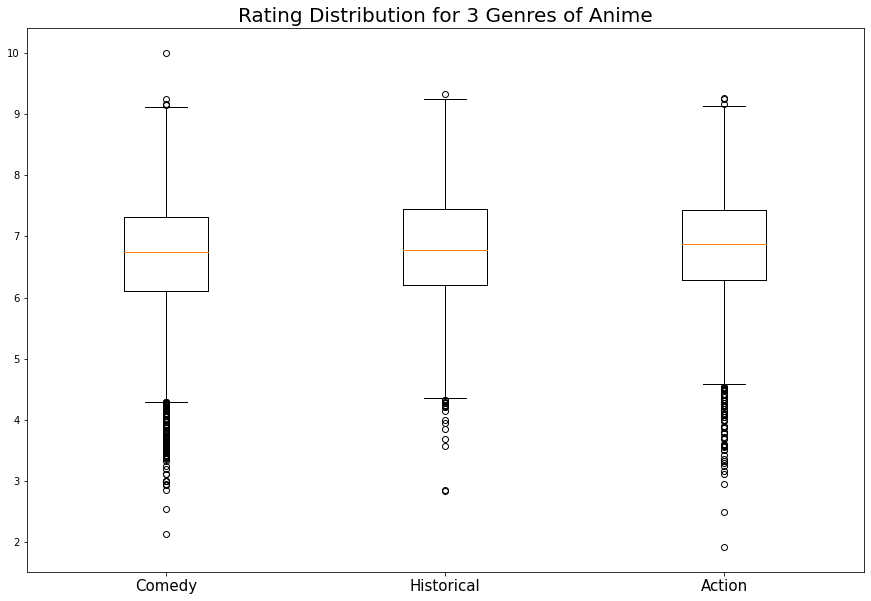

In [20]:
# L'ultima richiesta che vi farò è quella di creare dei plot descrittivi (con matplotlib) dei dati, in particolare:
# 1) scegliete tre generi e plottate in una unica riga, allineati, i boxplot che descrivono la distribuzione dei loro ratings

data = [anime[anime.Comedy].rating, anime[anime.Historical].rating, anime[anime.Action].rating]
fig,ax=plt.subplots(figsize = (15,10))
ax.boxplot(data)
ax.set_title('Rating Distribution for 3 Genres of Anime', size=20)
ax.set_xticklabels(['Comedy', 'Historical', 'Action'], size=15)


Text(0.5, 1.0, 'Pie of Genres')

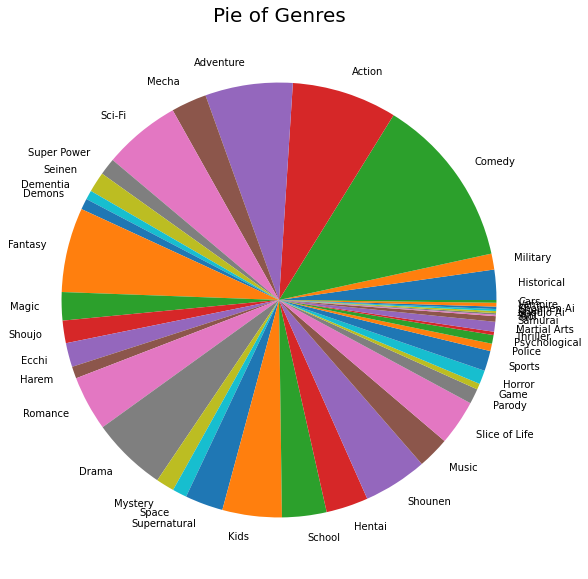

In [21]:
# 2) create un pie chart per i generi

fig,ax=plt.subplots(figsize = (15,10))
ax.pie(list(genres_count.values()),labels=list(genres_count.keys()))
ax.set_title ('Pie of Genres', size = 20)

Text(0.5, 1.0, 'Ratings per genre')

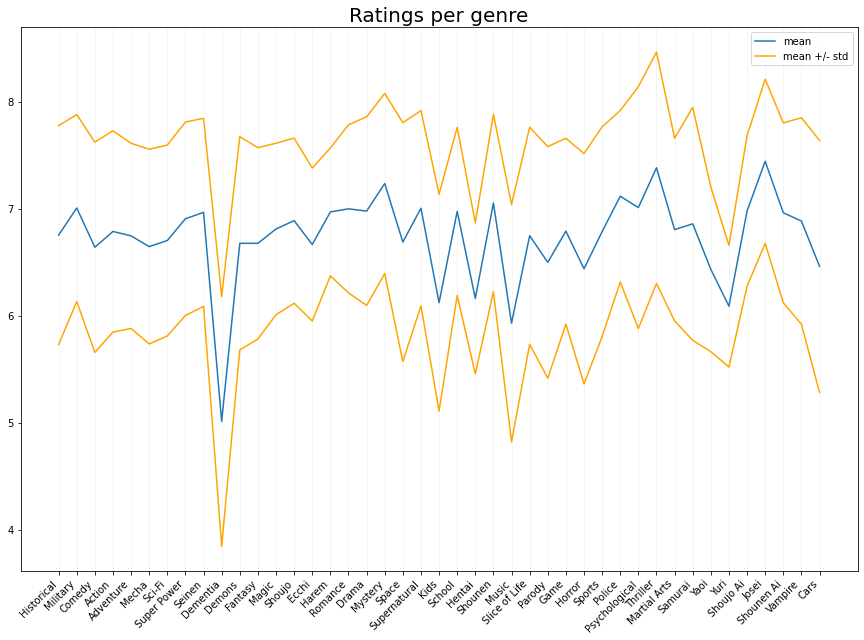

In [22]:
# 3) plottate in un unico grafico, uno dopo l'altro, la media dei ratings per ogni genere, la media meno la deviazione standard
# e la media più la deviazione standard, in modo da avere per ogni genere una sorta di intervallo di confidenza per i ratings

medie = list(np.array(anime[anime[g]].rating).mean() for g in list(genres_count.keys()))
deviazioni = list(np.array(anime[anime[g]].rating).std() for g in list(genres_count.keys()))
# qui ho dovuto convertirli in list perchè mi dava problemi nel plot, anche se poi faccio nuovamente una conversione

x = list(genres_count.keys())

# plottini
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
plt.plot(x,medie, label = "mean")
plt.plot(x, np.array(medie) + np.array(deviazioni), label = "mean +/- std", color = "orange")
plt.plot(x, np.array(medie) - np.array(deviazioni), color = "orange")
plt.xticks(rotation = 45 ,  ha="right")
plt.grid(axis='x', color='0.95')
plt.legend()
plt.title('Ratings per genre', size = 20)

# non saprei se può andare bene un plot così, forse meglio mettere i pallocchi?

In [23]:
# ANALISI LIBERA
# Adesso le possibilità sono pressoché infinite, potete studiare settorialmente i generi, i type, le distribuzioni dei rating 
# nelle varie sottofamiglie, etc.
# Questo è un ottimo dataset per esercitarsi a gestire feature binarie e metodi di classificazione o regressione molto semplici,
# per chi è interessato all'ambito Data Science è sicuramente un ottimo esercizio. Per chiunque avesse curiosità a riguardo 
# o semplicemente cercasse consigli è libero di contattarmi: Gianmarco Genalti +393479163061